In [12]:
from gurobipy import *
import numpy as np

##### Q 1 a
The process will be copied across all other problems in Q1.
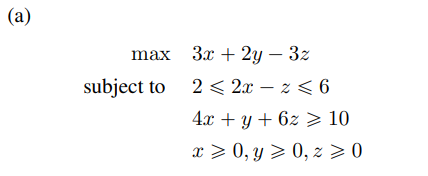

In [13]:
#creat model
m = Model()
coeff = [ -3, -2, 3]
cons= np.array([[2, 0,-1],[2,0,-1], [4, 1, 6]])
x = m.addVars(3, name = "x", lb = 0)
m.setObjective(sum(x[i]*coeff[i] for i in range(len(coeff))))
m.addConstr( sum(cons[0,:][i]*x[i] for i in range(len(coeff)))<= 6)
m.addConstr( sum(cons[1,:][i]*x[i] for i in range(len(coeff))) >= 2)
m.addConstr( sum(cons[2,:][i]*x[i] for i in range(len(coeff))) >=10)

m.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: AMD Athlon Gold 3150U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 3 rows, 3 columns and 7 nonzeros
Model fingerprint: 0x8a5a48eb
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 1e+01]
Presolve time: 0.01s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Infeasible or unbounded model


### Q 1 b
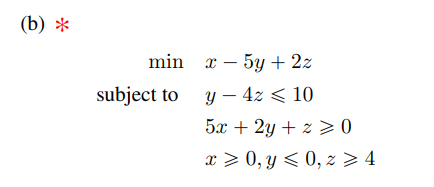


I have changed the variables so that $x,\hat{y},\hat{z} \geq 0$ using $-\hat{y} = y$ and $\hat{z} + 4 = z$ This gives new constraints and objective function.

\begin{align*}
&\text{Objective}  &8 + \text{min } x+5\hat{y} +2\hat{z} \\
&\text{Subject To} & -\hat{y} -4\hat{z} \leq 26 \\
&   &5x -2\hat{y} + \hat{z} \geq -4 \\
&   & x,\hat{y}, \hat{z} \geq 0

\end{align*}


In [24]:
#creat model
m = Model()
coeff2 = [ 1, 5, 2]
cons2= np.array([[0, -1,-4],[5,-2,1]])
x = m.addVars(3, name = "x", lb = 0)
m.setObjective(sum(x[i]*coeff2[i] for i in range(len(coeff2))))
m.addConstr( sum(cons2[0,:][i]*x[i] for i in range(len(coeff2)))<= 26)
m.addConstr( sum(cons2[1,:][i]*x[i] for i in range(len(coeff2)))>= -4)

m.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: AMD Athlon Gold 3150U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model fingerprint: 0x17cf3c26
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 3e+01]
Presolve removed 2 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  0.000000000e+00


In [26]:
#looking at our soluton
print("Objective = {}, x = {}, y = {}, z = {}".format(8 + m.objVal, x[0].x, -x[1].x, x[2].x +4 ))

Objective = 8.0, x = 0.0, y = -0.0, z = 4.0
